SAI RAINA
USC ID = 4650068238
Github Username = saitiger

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1(A)

In [2]:
df = pd.read_excel(r'../Data/Folds5x2_pp.xlsx',sheet_name='Sheet1')

1(B) (i)

In [3]:
df.shape 

(9568, 5)

There are 9568 Rows and 5 columns. The columns represent the independent and the dependent variables from the dataset.
The rows are the hourly reading for different variables. 

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


1 (B) (ii)

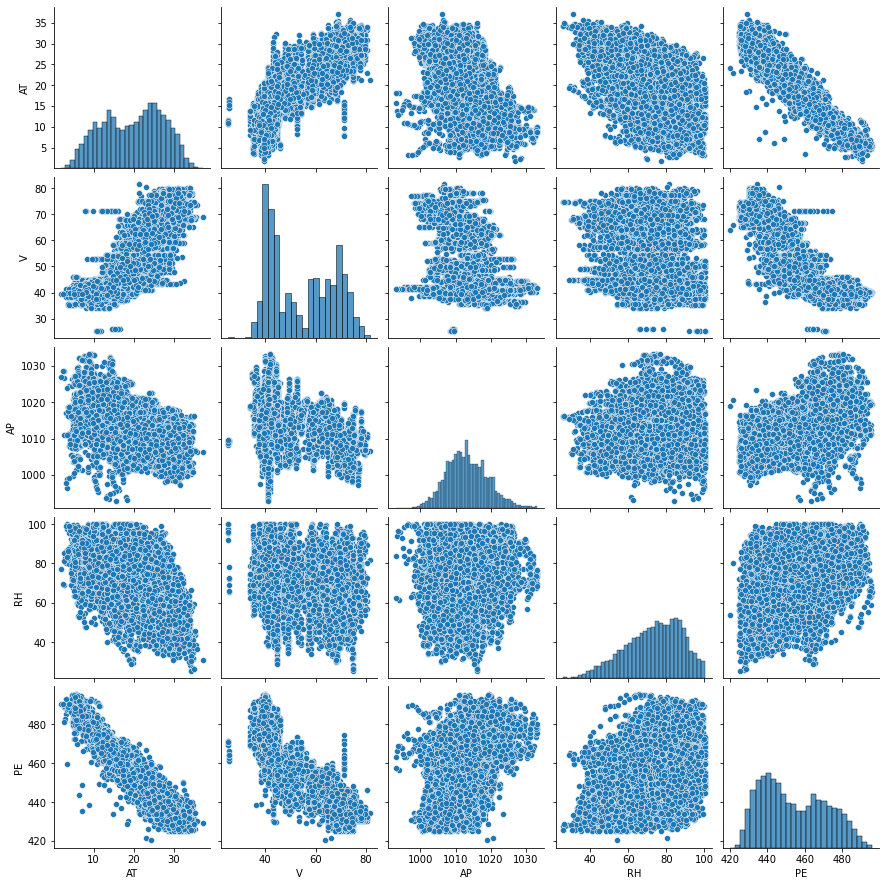

In [5]:
sns.pairplot(df) # Dependent Variable is PE 

The distribution for V is left skewed while RH is skewed a bit towards the right. 
All other plots have roughly same distribution across the values they exhibit.

AT and PE seem to be linearlly related except for some outliers. 
The relationship is negative that is a AT corresponds to a low PE generally.

The relationship between AP AND PE, RH AND PE doesn't seem to be linear and is scattered around a lot.

V and PE also are related in a negative way though not as strongly as AT and PE. Also after some point the relationship kind of 
skews away from the earlier trend.

1 (B) (iii)

In [6]:
st = df.describe().transpose()
st

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [7]:
Mean = st['mean']
Median = st['50%']
Range = st['max']-st['min']
First_Quartile = st['25%']
Third_Quartile = st['75%']
IQR = st['75%']-st['25%']

In [8]:
col_names = ["Variable","Mean","Median", "Range","First Quar","Third Quartile","Inter Quartile Range"]

table_data = [["AT",Mean[0],Median[0],Range[0],First_Quartile[0],Third_Quartile[0],IQR[0]], 
        ["V",Mean[1],Median[1],Range[1],First_Quartile[1],Third_Quartile[1],IQR[1]], 
        ["AP",Mean[2],Median[2],Range[2],First_Quartile[2],Third_Quartile[2],IQR[2]], 
        ["RH",Mean[3],Median[3],Range[3],First_Quartile[3],Third_Quartile[3],IQR[3]],
        ["PE",Mean[4],Median[4],Range[4],First_Quartile[4],Third_Quartile[4],IQR[4]]]      

print(tabulate(table_data, headers=col_names, tablefmt="grid",floatfmt=".5f"))

+------------+------------+------------+----------+--------------+------------------+------------------------+
| Variable   |       Mean |     Median |    Range |   First Quar |   Third Quartile |   Inter Quartile Range |
+============+============+============+==========+==============+==================+========================+
| AT         |   19.65123 |   20.34500 | 35.30000 |     13.51000 |         25.72000 |               12.21000 |
+------------+------------+------------+----------+--------------+------------------+------------------------+
| V          |   54.30580 |   52.08000 | 56.20000 |     41.74000 |         66.54000 |               24.80000 |
+------------+------------+------------+----------+--------------+------------------+------------------------+
| AP         | 1013.25908 | 1012.94000 | 40.41000 |   1009.10000 |       1017.26000 |                8.16000 |
+------------+------------+------------+----------+--------------+------------------+------------------------+
|

1 (C)

In [9]:
x_1 = df.iloc[:, :-1]
y_1 = df.iloc[:,-1]
# x_1 = sm.add_constant(x_1)
x_AT = x_1['AT']
x_V = x_1['V']
x_AP = x_1['AP']
x_RH = x_1['RH']

In [10]:
model_1 = sm.OLS(y_1,x_AT).fit()
model_2 = sm.OLS(y_1,x_V).fit()
model_3 = sm.OLS(y_1,x_AP).fit()
model_4 = sm.OLS(y_1,x_RH).fit()

In [11]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          5.405e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:22   Log-Likelihood:                         -63065.
No. Observations:                9568   AIC:                                  1.261e+05
Df Residuals:                    9567   BIC:                                  1.261e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            19.9415      0.086    232.492      0.000      19.773      20.110
==============================================================================
Omnibus:                     3063.612   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.616
Skew:                           0.163   Prob(JB):                    7.91e-107
Kurtosis:                       1.942   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.318e+05
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:22   Log-Likelihood:                         -59245.
No. Observations:                9568   AIC:                                  1.185e+05
Df Residuals:                    9567   BIC:                                  1.185e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V              7.8718      0.022    363.069      0.000       7.829       7.914
==============================================================================
Omnibus:                    66054.809   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.586
Skew:                          -0.148   Prob(JB):                    3.02e-193
Kurtosis:                       1.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.863e+06
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:22   Log-Likelihood:                         -40014.
No. Observations:                9568   AIC:                                  8.003e+04
Df Residuals:                    9567   BIC:                                  8.004e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             0.4485      0.000   2804.187      0.000       0.448       0.449
==============================================================================
Omnibus:                     1766.564   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.887
Skew:                           0.372   Prob(JB):                    2.94e-124
Kurtosis:                       2.065   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          2.727e+05
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:22   Log-Likelihood:                         -55937.
No. Observations:                9568   AIC:                                  1.119e+05
Df Residuals:                    9567   BIC:                                  1.119e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             5.9789      0.011    522.205      0.000       5.956       6.001
==============================================================================
Omnibus:                      331.122   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.974
Skew:                           0.402   Prob(JB):                     1.48e-69
Kurtosis:                       2.616   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p values are extremely small meaning that all the independent variables are statistically significant.

<AxesSubplot:xlabel='AT', ylabel='PE'>

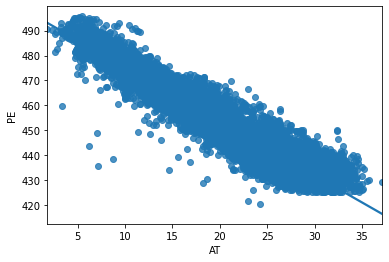

In [15]:
sns.regplot(x = x_AT,y = y_1,data = df,ci=None,marker='o')

<AxesSubplot:xlabel='AP', ylabel='PE'>

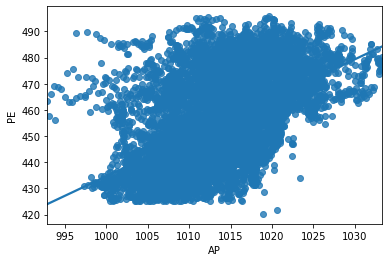

In [16]:
sns.regplot(x = x_AP,y = y_1,data = df,ci=None,marker='o')

<AxesSubplot:xlabel='V', ylabel='PE'>

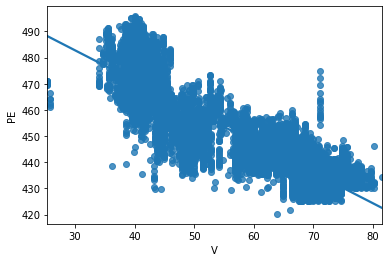

In [17]:
sns.regplot(x = x_V,y = y_1,data = df,ci=None,marker='o')

<AxesSubplot:xlabel='RH', ylabel='PE'>

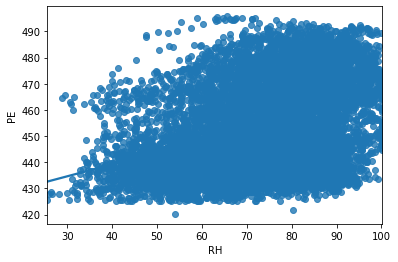

In [18]:
sns.regplot(x = x_RH,y = y_1,data = df,ci=None,marker='o')

In the dataset there are 9568 rows that is n = 9568 hence 4/n = 0.0004180602006688963 

Therefore points having cooks distance > 0.0004180602006688963 are deemed to be an outlier.

In [19]:
np.set_printoptions(suppress=True)

influence = model_1.get_influence()

cooks_distances_1 = influence.cooks_distance

outliers_1 = cooks_distances_1[0]>0.0004180602006688963

print("Outliers : ",outliers_1.sum())

Outliers :  103


In [20]:
np.set_printoptions(suppress=True)

influence = model_2.get_influence()

cooks_distances_2 = influence.cooks_distance

outliers_2 = cooks_distances_2[0]>0.0004180602006688963
print("Outliers : ",outliers_2.sum())

Outliers :  132


In [21]:
np.set_printoptions(suppress=True)

influence = model_3.get_influence()

cooks_distances_3 = influence.cooks_distance

outliers_3 = cooks_distances_3[0]>0.0004180602006688963
print("Outliers : ",outliers_3.sum())

Outliers :  196


In [22]:
np.set_printoptions(suppress=True)

influence = model_4.get_influence()

cooks_distances_4 = influence.cooks_distance

cooks_distances_4

outliers_4 = cooks_distances_4[0]>0.0004180602006688963
outliers_4.sum()
print("Outliers : ",outliers_4.sum())

Outliers :  132


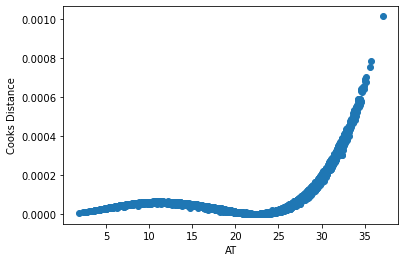

In [23]:
plt.scatter(x_AT, cooks_distances_1[0])
plt.xlabel('AT')
plt.ylabel('Cooks Distance')
plt.show()

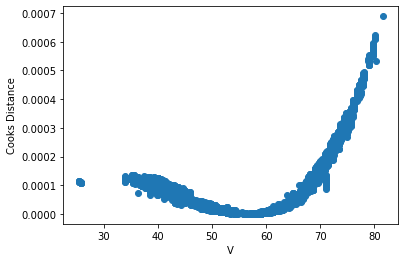

In [24]:
plt.scatter(x_V, cooks_distances_2[0])
plt.xlabel('V')
plt.ylabel('Cooks Distance')
plt.show()

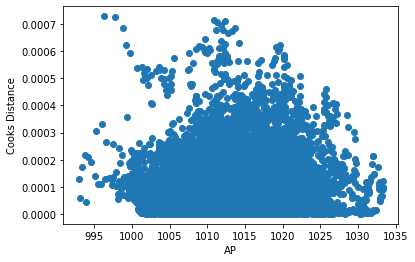

In [25]:
plt.scatter(x_AP, cooks_distances_3[0])
plt.xlabel('AP')
plt.ylabel('Cooks Distance')
plt.show()

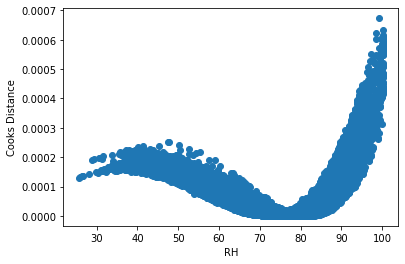

In [26]:
plt.scatter(x_RH, cooks_distances_4[0])
plt.xlabel('RH')
plt.ylabel('Cooks Distance')
plt.show()

1 (D)

In [27]:
# Multiple Linear Regression 

model_5 = sm.OLS(y_1,x_1).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:23   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6781      0.015   -109.169      0.000      -1.708      -1.648
V             -0.2726      0.008    -34.019      0.000      -0.288      -0.257
AP             0.5028      0.000   1209.083      0.000       0.502       0.504
RH            -0.0999      0.004    -22.678      0.000      -0.109      -0.091
==============================================================================
Omnibus:                      491.038   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1475.265
Skew:                          -0.224   Prob(JB):                         0.00
Kurtosis:                       4.871   Cond. No.                         336.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p-values are extremely small the null hypothesis can be rejected for every predictor.

1 (E)

[array([19.94150373]), array([7.87181936]), array([0.44845515]), array([5.97888864])]
[-1.67805606 -0.2726474   0.50279578 -0.09992724]


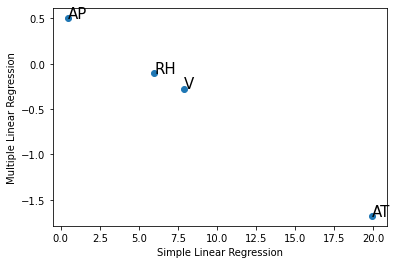

In [28]:
# Each Predictor is a point x axis is from simple linear y axis is multiple linear regression
labels = ['AT','V','AP','RH']
a = [model_1.params.values,model_2.params.values,model_3.params.values,model_4.params.values]
b = model_5.params.values

print(a)
print(b)

plt.scatter(a,b)
plt.xlabel("Simple Linear Regression")
plt.ylabel("Multiple Linear Regression")

for i in range(len(a)):
    plt.annotate(labels[i], (a[i], b[i]),fontsize=15)


Polynomial Regression is performing better than the simple linear regression done using individual predictors.

1 (F)

In [29]:
polynomial_features= PolynomialFeatures(degree=3)
x_AT = x_AT.values.reshape(-1,1)
xpoly_AT = polynomial_features.fit_transform(x_AT)
x_V = x_V.values.reshape(-1,1)
xpoly_V = polynomial_features.fit_transform(x_V)
x_AP = x_AP.values.reshape(-1,1)
xpoly_AP = polynomial_features.fit_transform(x_AP)
x_RH = x_RH.values.reshape(-1,1)
xpoly_RH = polynomial_features.fit_transform(x_RH)

In [30]:
model_6 = sm.OLS(y_1, xpoly_AT).fit()
model_7 = sm.OLS(y_1, xpoly_V).fit()
model_8 = sm.OLS(y_1, xpoly_AP).fit()
model_9 = sm.OLS(y_1, xpoly_RH).fit()

In [31]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1 (G)

In [35]:
x_2 = df.iloc[:,:-1]
intr = PolynomialFeatures(include_bias = False, interaction_only=True)
x_intr = intr.fit_transform(x_2)

c = ['AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']
pd.DataFrame(x_intr,columns=c)

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [36]:
model_10 = sm.OLS(y_1, x_intr).fit()

In [37]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:24   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6622      2.312      0.286      0.775      -3.869       5.193
x2            -4.2156      1.296     -3.252      0.001      -6.757      -1.675
x3             0.5174      0.002    290.799      0.000       0.514       0.521
x4             7.1723      0.432     16.589      0.000       6.325       8.020
x5             0.0180      0.001     21.563      0.000       0.016       0.020
x6            -0.0029      0.002     -1.268      0.205      -0.007       0.002
x7            -0.0070      0.001     -8.880      0.000      -0.009      -0.005
x8             0.0035      0.001      2.731      0.006       0.001       0.006
x9             0.0004      0.000      0.828      0.408      -0.001       0.001
x10           -0.0071      0.000    -16.561      0.000      -0.008      -0.006
==============================================================================
Omnibus:                     1425.527   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8438.791
Skew:                          -0.578   Prob(JB):                         0.00
Kurtosis:                       7.453   Cond. No.                     5.65e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

V-RH is not statistically significant 
AT-AP is not statistically significant 
All other interaction terms are statistically significant based on the p values obtained.

1 (H)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, train_size = 0.70, random_state = 0)

In [39]:
model_11 = sm.OLS(y_train, x_train).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.356e+07
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:30:24   Log-Likelihood:                         -20348.
No. Observations:                6697   AIC:                                  4.070e+04
Df Residuals:                    6693   BIC:                                  4.073e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6657      0.018    -90.560      0.000      -1.702      -1.630
V             -0.2799      0.010    -29.220      0.000      -0.299      -0.261
AP             0.5029      0.000   1012.544      0.000       0.502       0.504
RH            -0.0993      0.005    -18.891      0.000      -0.110      -0.089
==============================================================================
Omnibus:                      433.002   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1436.257
Skew:                          -0.283   Prob(JB):                         0.00
Kurtosis:                       5.197   Cond. No.                         336.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_pred_test = model_11.predict(x_test)
y_pred_train = model_11.predict(x_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print("Test MSE : ", mse_test)
print("Train MSE : ", mse_train)

Test MSE :  25.46087101901757
Train MSE :  25.506008330854893


In [41]:
poly_intr = PolynomialFeatures(degree = 2)
x_poly_train = poly_intr.fit_transform(x_train)
x_poly_test = poly_intr.fit_transform(x_test)

model_12 = sm.OLS(y_train, x_poly_train).fit()

model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
x1            -6.3067      3.826     -1.648      0.099     -13.807       1.194
x2            -2.7832      1.818     -1.531      0.126      -6.347       0.780
x3            14.8033      2.916      5.076      0.000       9.086      20.521
x4             3.3825      1.086      3.114      0.002       1.253       5.512
x5             0.0168      0.004      4.482      0.000       0.009       0.024
x6             0.0103      0.003      3.174      0.002       0.004       0.017
x7             0.0037      0.004      0.997      0.319      -0.004       0.011
x8            -0.0061      0.002     -3.305      0.001      -0.010      -0.002
x9            -0.0005      0.001     -0.551      0.581      -0.002       0.001
x10            0.0023      0.002      1.290      0.197      -0.001       0.006
x11            0.0003      0.001      0.340      0.734      -0.001       0.002
x12           -0.0072      0.001     -5.108      0.000      -0.010      -0.004
x13           -0.0031      0.001     -2.934      0.003      -0.005      -0.001
x14           -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x_poly_train_opt = x_poly_train[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14]] # Dropped x11

model_13 = sm.OLS(y_train, x_poly_train_opt).fit()

model_13.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7621.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6683   BIC:                         3.862e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7038.8322   1502.025     -4.686      0.000   -9983.281   -4094.384
x1            -6.6428      3.696     -1.797      0.072     -13.887       0.602
x2            -2.5932      1.729     -1.500      0.134      -5.983       0.797
x3            14.7374      2.910      5.065      0.000       9.033      20.442
x4             3.3058      1.062      3.112      0.002       1.223       5.388
x5             0.0176      0.003      6.059      0.000       0.012       0.023
x6             0.0096      0.002      3.866      0.000       0.005       0.014
x7             0.0040      0.004      1.110      0.267      -0.003       0.011
x8            -0.0056      0.001     -5.528      0.000      -0.008      -0.004
x9            -0.0004      0.001     -0.449      0.653      -0.002       0.001
x10            0.0021      0.002      1.245      0.213      -0.001       0.005
x11           -0.0072      0.001     -5.097      0.000      -0.010      -0.004
x12           -0.0030      0.001     -2.927      0.003      -0.005      -0.001
x13           -0.0019      0.000     -6.500      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1414.927   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12101.785
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.403   Cond. No.                     2.95e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
x_poly_train_opt = x_poly_train_opt[:, [0,1,2,3,4,5,6,7,8,10,11,13]] # Dropped x9

model_14 = sm.OLS(y_train, x_poly_train_opt).fit()

model_14.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8996.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -19253.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6685   BIC:                         3.861e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5219.8900   1367.467     -3.817      0.000   -7900.562   -2539.218
x1           -13.3255      2.935     -4.541      0.000     -19.078      -7.573
x2            -1.2585      1.671     -0.753      0.451      -4.535       2.017
x3            11.4266      2.681      4.262      0.000       6.170      16.683
x4             0.2032      0.051      3.992      0.000       0.103       0.303
x5             0.0201      0.003      7.953      0.000       0.015       0.025
x6             0.0085      0.002      5.306      0.000       0.005       0.012
x7             0.0105      0.003      3.624      0.000       0.005       0.016
x8            -0.0040      0.001     -4.772      0.000      -0.006      -0.002
x9             0.0008      0.002      0.473      0.636      -0.002       0.004
x10           -0.0057      0.001     -4.328      0.000      -0.008      -0.003
x11           -0.0017      0.000     -5.992      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1412.779   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12121.594
Skew:                          -0.767   Prob(JB):                         0.00
Kurtosis:                       9.410   Cond. No.                     2.68e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
x_poly_train_opt = x_poly_train_opt[:, [0,1,2,3,4,5,6,7,8,10,11]] # Dropped x9

model_15 = sm.OLS(y_train, x_poly_train_opt).fit()

model_15.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9897.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -19253.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.860e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5212.9466   1367.309     -3.813      0.000   -7893.309   -2532.585
x1           -14.4087      1.835     -7.854      0.000     -18.005     -10.812
x2            -0.4683      0.032    -14.711      0.000      -0.531      -0.406
x3            11.3919      2.680      4.251      0.000       6.138      16.646
x4             0.2060      0.051      4.074      0.000       0.107       0.305
x5             0.0204      0.002      8.466      0.000       0.016       0.025
x6             0.0082      0.001      5.647      0.000       0.005       0.011
x7             0.0115      0.002      6.510      0.000       0.008       0.015
x8            -0.0041      0.001     -4.865      0.000      -0.006      -0.002
x9            -0.0057      0.001     -4.312      0.000      -0.008      -0.003
x10           -0.0017      0.000     -6.072      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1413.258   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12109.872
Skew:                          -0.768   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.68e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
x_poly_test_opt = x_poly_test[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14]] # Dropped x11
x_poly_test_opt = x_poly_test_opt[:, [0,1,2,3,4,5,6,7,8,10,11,13]] # Dropped x9
x_poly_test_opt = x_poly_test_opt[:, [0,1,2,3,4,5,6,7,8,10,11]] # Dropped x9

In [46]:
ypoly_pred_test = model_15.predict(x_poly_test_opt)
ypoly_pred_train = model_15.predict(x_poly_train_opt)

mse_test = mean_squared_error(y_test, ypoly_pred_test)
mse_train = mean_squared_error(y_train, ypoly_pred_train)

print("Test MSE : ", mse_test)
print("Train MSE : ", mse_train)

Test MSE :  17.582157879760278
Train MSE :  18.391347345805627


In [47]:
mse_ls = []
for K in range(1,101):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  
    pred = model.predict(x_test) 
    err_test = mean_squared_error(y_test,pred)
    mse_ls.append(err_test) 
    print('MSE (TEST) value for K = ' , K , 'is:', err_test)
print("Minimum MSE(TEST) KNN Raw : ",min(mse_ls))

MSE (TEST) value for K =  1 is: 22.578229536746782
MSE (TEST) value for K =  2 is: 17.93334182340648
MSE (TEST) value for K =  3 is: 16.466587530477184
MSE (TEST) value for K =  4 is: 15.88698026384535
MSE (TEST) value for K =  5 is: 15.6635051689307
MSE (TEST) value for K =  6 is: 15.732130433646825
MSE (TEST) value for K =  7 is: 15.910543952544455
MSE (TEST) value for K =  8 is: 16.042966018482232
MSE (TEST) value for K =  9 is: 16.222580479550718
MSE (TEST) value for K =  10 is: 16.30541188610239
MSE (TEST) value for K =  11 is: 16.466153067580898
MSE (TEST) value for K =  12 is: 16.556084550727572
MSE (TEST) value for K =  13 is: 16.581670698208345
MSE (TEST) value for K =  14 is: 16.635026905401645
MSE (TEST) value for K =  15 is: 16.829076117341987
MSE (TEST) value for K =  16 is: 16.944992292809566
MSE (TEST) value for K =  17 is: 17.079978323625234
MSE (TEST) value for K =  18 is: 17.273048839286872
MSE (TEST) value for K =  19 is: 17.341845642884095
MSE (TEST) value for K =  

In [48]:
mse_ls_train = []
for K in range(1,101):
    model_t = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_t.fit(x_train, y_train)  
    pred_t = model.predict(x_train) 
    err_train = mean_squared_error(y_train,pred_t)
    mse_ls_train.append(err_train) 
    print('MSE (TRAIN) value for K = ' , K , 'is:', err_train)
print("Minimum MSE(TRAIN) KNN Raw : ",min(mse_ls_train))

MSE (TRAIN) value for K =  1 is: 21.760166349159327
MSE (TRAIN) value for K =  2 is: 21.760166349159327
MSE (TRAIN) value for K =  3 is: 21.760166349159327
MSE (TRAIN) value for K =  4 is: 21.760166349159327
MSE (TRAIN) value for K =  5 is: 21.760166349159327
MSE (TRAIN) value for K =  6 is: 21.760166349159327
MSE (TRAIN) value for K =  7 is: 21.760166349159327
MSE (TRAIN) value for K =  8 is: 21.760166349159327
MSE (TRAIN) value for K =  9 is: 21.760166349159327
MSE (TRAIN) value for K =  10 is: 21.760166349159327
MSE (TRAIN) value for K =  11 is: 21.760166349159327
MSE (TRAIN) value for K =  12 is: 21.760166349159327
MSE (TRAIN) value for K =  13 is: 21.760166349159327
MSE (TRAIN) value for K =  14 is: 21.760166349159327
MSE (TRAIN) value for K =  15 is: 21.760166349159327
MSE (TRAIN) value for K =  16 is: 21.760166349159327
MSE (TRAIN) value for K =  17 is: 21.760166349159327
MSE (TRAIN) value for K =  18 is: 21.760166349159327
MSE (TRAIN) value for K =  19 is: 21.760166349159327
MS

Text(0.5, 1.0, 'Raw')

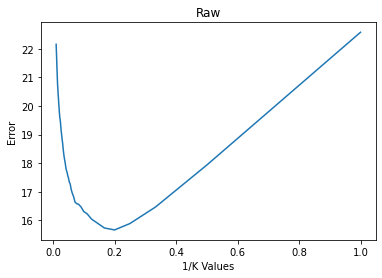

In [49]:
rg = []
for i in range(1,101):
    rg.append(1/i)

plt.plot(rg,mse_ls)
plt.xlabel("1/K Values")
plt.ylabel("Error")
plt.title("Raw")

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)


In [51]:
mse_scaled_ls = []

for K in range(1,101):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train_scaled, y_train)  
    pred = model.predict(x_test_scaled) 
    err_scaled = mean_squared_error(y_test,pred)
    mse_scaled_ls.append(err_scaled) 
    print('MSE value (TEST) for k = ' , K , 'is:', err_scaled)
    
print("Minimum MSE (TEST) KNN Scaled : ",min(mse_scaled_ls))

MSE value (TEST) for k =  1 is: 24.29258369905957
MSE value (TEST) for k =  2 is: 17.8007201497736
MSE value (TEST) for k =  3 is: 16.0447649444638
MSE value (TEST) for k =  4 is: 15.210558631574367
MSE value (TEST) for k =  5 is: 14.895724154649953
MSE value (TEST) for k =  6 is: 14.659682056194127
MSE value (TEST) for k =  7 is: 14.740871867869409
MSE value (TEST) for k =  8 is: 14.744094264302506
MSE value (TEST) for k =  9 is: 14.86004621093868
MSE value (TEST) for k =  10 is: 14.870464735980502
MSE value (TEST) for k =  11 is: 14.973352600671875
MSE value (TEST) for k =  12 is: 15.00490837058324
MSE value (TEST) for k =  13 is: 15.083524397412209
MSE value (TEST) for k =  14 is: 15.149502264197222
MSE value (TEST) for k =  15 is: 15.283299579705108
MSE value (TEST) for k =  16 is: 15.39772912530478
MSE value (TEST) for k =  17 is: 15.42823604678211
MSE value (TEST) for k =  18 is: 15.578019376287358
MSE value (TEST) for k =  19 is: 15.658788425954068
MSE value (TEST) for k =  20 i

In [52]:
mse_ls_train_scaled = []
for K in range(1,101):
    model_t = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_t.fit(x_train_scaled, y_train)  
    pred_t = model.predict(x_train_scaled) 
    err_train_scaled = mean_squared_error(y_train,pred_t)
    mse_ls_train.append(err_train) 
    print('MSE (TRAIN) Scaled value for K = ' , K , 'is:', err_train_scaled)

MSE (TRAIN) Scaled value for K =  1 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  2 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  3 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  4 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  5 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  6 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  7 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  8 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  9 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  10 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  11 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  12 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  13 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  14 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  15 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  16 is: 18.572058660985512
MSE (TRAIN) Scaled value for K =  17 is: 18.57205

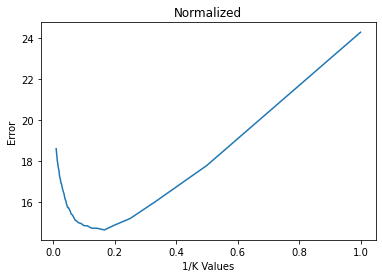

In [53]:
rg = []
for i in range(1,101):
    rg.append(1/i)
    
plt.xlabel("1/K Values")
plt.ylabel("Error")
plt.title("Normalized")
plt.plot(rg,mse_scaled_ls)

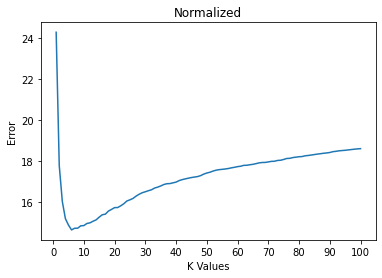

In [54]:
rg = []
for i in range(1,101):
    rg.append(i)
    
plt.xlabel("K Values")
plt.ylabel("Error")
plt.title("Normalized")
plt.xticks(np.arange(0, 101, step=10))
plt.plot(rg,mse_scaled_ls)

# 1 (J)

Minimum Test MSE Linear Regression :  17.582157879760278
Minimum Test MSE KNN  :  14.659682056194127

KNN performs better on the given dataset which can be attributed to it be a non parametric model thereby not overfitting and it is also more robust to outliers in comparision to our regression model.

Refrences : 
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures
https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html
https://www.statology.org/how-to-identify-influential-data-points-using-cooks-distance/#:~:text=A%20data%20point%20that%20has,considered%20to%20be%20an%20outlier.